In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fft2, ifft2
from utils.generate_field import *

ModuleNotFoundError: No module named 'utils'

# Fast Fourier Transform 


```{margin} **Question**
<span style='color:navy'> Why the indices range from 0 to N-1 instead of 1 to N? </span>

Related to error[^dft_ref1].
```

[^dft_ref1]: [De-aliasing in Fast Fourier Transform.](https://math.jhu.edu/~feilu/notes/DealiasingFFT.pdf)


## Discrete Fourier Transform (DFT)
Given sequential data $\{X_j\}_{j=0}^{N-1}$ of length $N$ at time index $j$, we could convert the time-domain discrete sequence into frequency-domain discrete spectrum by **discrete Fourier transform (DFT)**:

$$
x_k = \sum_{j=0}^{N-1} X_je^{-2\pi ikj/N}, \quad 0\le k\le N-1
$$(eq:fft_discrete_forward)

The vector $X$ can be recovered from $x_k$ by **inverse discrete Fourier transform(IDFT)**,

$$
X_j = \frac{1}{N} \sum_{k=0}^{N-1} x_k e^{2\pi ikj/N}, \quad 0 \le j \le N-1
$$

```{margin}
**Notation**
Use Greek letter $\kappa$ to represent the value of wave number and latin letter $k$ for the index of wave number.
```

(wavenumber_dft)=
```{prf:proof} **Wave number of DFT**


Define wave number as

$$\kappa(k) = \frac{2\pi}{L_x} k$$(eq:wave_number)

and $ x = j\Delta x$. We could thereby obtain that Eq.{eq}`eq:fft_discrete_forward` is the same to

$$
\hat{f}(\kappa) = \int_0^{L_x} f(x) e^{-i\kappa x} dx.
$$

Also, length of the domain is $L_x = N * \Delta x$. Then, we have

$$
\hat{f}(k) = \sum_{j=0}^{N-1} f(x_j) e^{-2\pi ikj/N}, \quad 0\le k\le N-1.
$$
```

sum is equal to 0.00
sum is equal to 0.00
sum is equal to 0.00


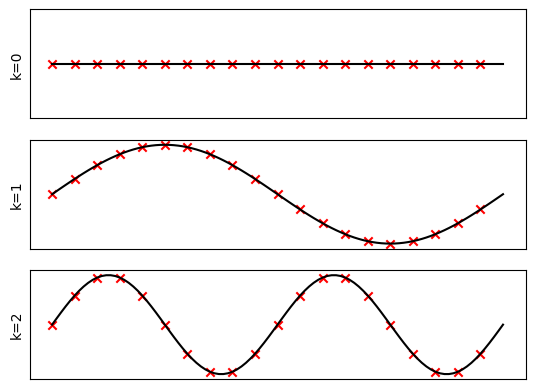

In [26]:
x = np.linspace(0, 2, 100+1)*np.pi
f = lambda k, x: np.sin(k*x)

fig, axes = plt.subplots(3, 1,)
for k in range(3):
    axes[k].tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    axes[k].plot(x, f(k, x), color='black')
    axes[k].scatter(x[:-1:5], f(k, x[:-1:5]), marker='x', color='r')
    axes[k].set_ylabel('k=%.1i' % k)
    print('sum is equal to %.2f' %(np.sum(f(k, x[:-1:5]))))
fig.show()



````{prf:definition} Scaled Coefficient
Usually, we would obtain the scaled Fourier coefficient $\hat{x}_k$ from the DFT instead of the Fourier coefficient $x_k$. For example, in FFTW, the inverse Fourier transform is not normalized, so that we don't need to worry about the scale of result from `r2c` (DFT) followed by `c2r` (IDFT) if we calculate the scaled Fourier coefficient when we do the DFT,

$$
\begin{equation}
\hat{x}_k = \sum_{j=0}^{N-1} \frac{1}{N}X_j e^{-2\pi ikj/N}, \quad 0\le k\le N-1
\end{equation}
$$

```{prf:proof} **Scaled Coefficient**

$$
\begin{aligned}
f(x_j) &= \sum_{k=0}^{N-1} \hat{f}(\kappa) e^{i\kappa x_j},\\
& = \sum_{k=0}^{N-1} \left(\sum_{j'=0}^{N-1} \frac{1}{N} f(x_{j'}) e^{-i\kappa x_{j'}}\right) e^{i\kappa x_j},\\
& = \sum_{j'=0}^{N-1} \frac{1}{N} f(x_j') \underbrace{\left[\sum_{k=0}^{N-1} e^{ik\frac{2\pi}{N}(j-j')}\right]}_{S_{jj'}},\\
& = \frac{1}{N} f(x_{j}) N = f(x_j),
\end{aligned}
$$

since $S_{jj'}$ equal to $N$ when $j=j'$ and $0$ otherwise. Numerical solution is given on the right.

```

````

In this way, we could obtain the Fourier coefficient. Usually, the order of wave number index $k$ in the FFT output (e.g Matlab, FFTW) is $[0, 1, 2, \dots, N/2-1, N/2, -N/2+1, \dots, -1]$.

```{prf:definition} Nyquist Frequency
The Nyquist frequency $f_N$ is the highest frequency that equipment of a given sample rate can reliably measure, one-half the given sample rate $f_s$. In our case, the spatial frequency $\xi = \frac{\kappa}{2\pi}$, so that the Nyquist frequency is $\frac{1}{2L} k$ and corresponding wave number is $\kappa(N) = \frac{1}{2}\kappa(\frac{N}{2})$.

[Further investigation about aliasing]
```

The FFT coefficient of Nyquist frequency is

$$
\begin{align}
\hat{f}(\kappa(\frac{N}{2})) &= \sum_{j = 0}^{N-1} f(x_j) e^{\ii \kappa(\frac{N}{2}) x_j}\\
& = \sum_{j = 0}^{N-1} f(x_j) e^{\ii \pi j}\\
& = \sum_{j = 0}^{N-1} f(x_j) =  \hat{f}(0)
\end{align}
$$

So that the information on Nyquist frequency is repeated. (Maybe also related to Nyquist frequency is the highest frequency that we could represent in FFT) Usually, we set the coefficient of Nyquist frequency as 0.

### Aliasing


### De-aliasing

### Modified Wavenumber
[^modified_wavenumber_ref1]
[^modified_wavenumber_ref2]

[^modified_wavenumber_ref1]: [Compact Scheme](https://en.wikipedia.org/wiki/Compact_finite_difference)
[^modified_wavenumber_ref2]: [Modified Wave Number](https://www.nas.nasa.gov/assets/pdf/ams/2018/introtocfd/Intro2CFD_Lecture2_Lecture3_Pulliam_Chap3_Modk.pdf)



### Fast Fourier Transform (FFT)
The central idea of various FFT algorithms is that a DFT of a sequence of N points can be written in terms of two DFTs of length N/2. Thus if N is a power of two, this decomposition will lead to DFTs with of single points. More precisely, denoting $\phi_N = e^{2\pi i/N}$, we have
$$
e^{-2\pi ikj/N} = (\phi_N)^{kj}, \quad (\phi_N)^{2kj} = (\phi_{N/2})^{kj}
$$

And

$$
\begin{align}
x_k 
=& \sum_{j=0}^{N-1}X_j(\phi_N)^{kj},\\
=&  \sum_{j=0, 2, \dots}^{N-2} X_j(\phi_N)^{kj} + \sum_{j=1, 3, \dots}^{N-1} X_j(\phi_N)^{kj},\\
=&  \sum_{j=0}^{N/2-1} X_{2j}(\phi_{N})^{2kj} + \phi_{N} \sum_{j=0}^{N/2-1} X_{2j+1}(\phi_{N})^{2kj},\\
=& x_1(k) + \phi_{N}x_2(k),
\end{align}
$$

in which $x_1(k) = x_{2k}$ and $x_2(k)= x_{2k+1}$.


In [27]:
# Setup
dims = [128, 128, 64]
domain = [2*np.pi, np.pi, 1]

mu_L=np.array([0.5, 0.5, 0.5])
sigma = 1

# Coordinates
x, y, z =  xyz(domain, dims)
# Source Location
x0, y0, z0 = mu_L*domain

In [36]:
f = np.exp(-( (x-x0)**2 )/sigma**2/2)
f_hat = fft(f)

F_hat = np.exp(-( (x-x0)**2 )/0.1**2/2)
F = ifft(F_hat)

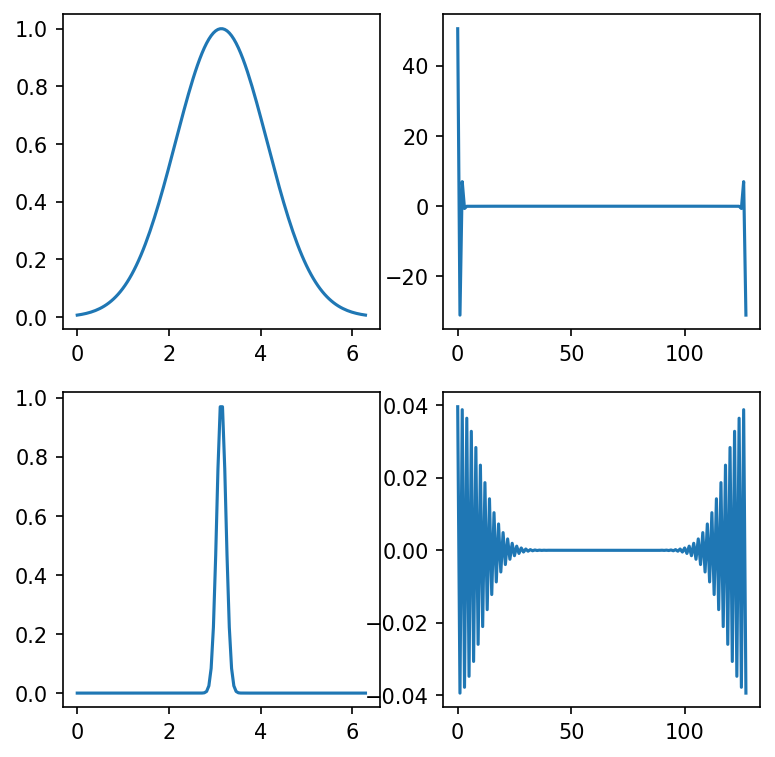

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), dpi=150)
axes = axes.flatten()
axes[0].plot(x, f.T)

axes[1].plot(f_hat.T)

axes[2].plot(x, F_hat.T)
axes[3].plot(F.T)


## 2-dimensional Discrete Fourier Tranform

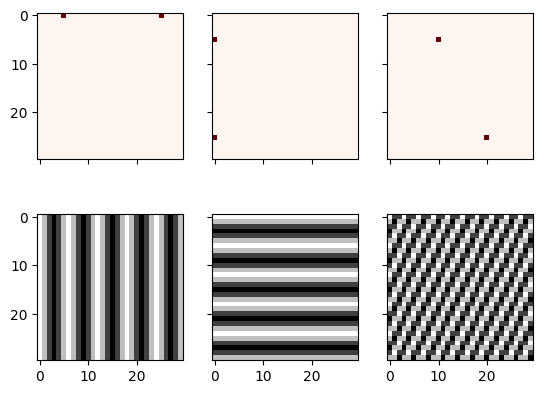

In [30]:
from scipy.fft import fftn, ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()

In [31]:
f2 = np.exp(-( (x[:, np.newaxis]-x0)**2 + (y[np.newaxis, :]-y0)**2 )/sigma**2/2)

f2_hat = fft2(f)

TypeError: float() argument must be a string or a real number, not 'Figure'

/home/zyou6474/Projects/ERI/.venv/lib/python3.10/site-packages/matplotlib/contour.py:1454: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = float(z.max())
/home/zyou6474/Projects/ERI/.venv/lib/python3.10/site-packages/matplotlib/contour.py:1455: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = float(z.min())
/home/zyou6474/Projects/ERI/.venv/lib/python3.10/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


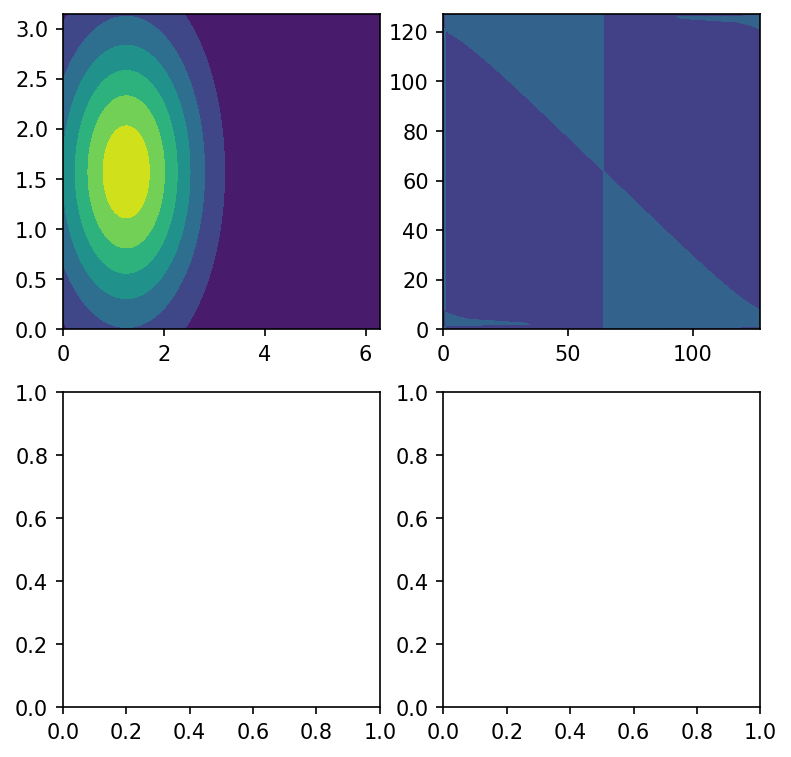

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), dpi=150)
axes = axes.flatten()
axes[0].contourf(x, y, data.T)

axes[1].contourf(f_hat.T)



## 